[*********************100%***********************]  1 of 1 completed


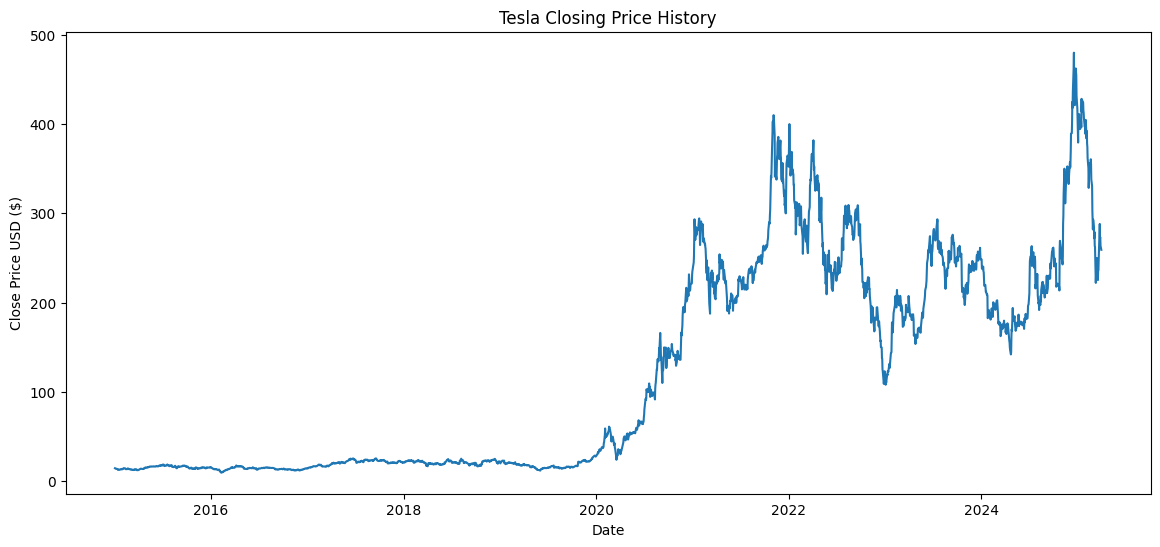

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, LSTM

# Download Tesla stock data
df = yf.download('TSLA', start='2015-01-01', end='2025-04-01')

# Visualize closing price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'])
plt.title('Tesla Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# #Assume df is already defined (your TSLA stock DataFrame)

# Step 1: Clean column names (handle MultiIndex)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip().lower() for col in df.columns.values]
else:
    df.columns = df.columns.str.strip().str.lower()

# #Debug: Print cleaned column names
print("Column names after cleaning:", df.columns.tolist())

## Step 2: Locate the 'close' column (like 'close_tsla')
close_candidates = [col for col in df.columns if 'close' in col]
if not close_candidates:
    raise KeyError("No column containing 'close' found. Please check column names.")
close_col = close_candidates[0]
print("Using column for closing prices:", close_col)

## Step 3: Drop NA and select the close column
df = df.dropna(subset=[close_col])
data = df[[close_col]]
dataset = data.values

# Step 4: Scale the dataset to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Step 5: Prepare training data (80% for training)
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0:training_data_len]

X_train, y_train = [], []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays and reshape
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Final shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Column names after cleaning: ['close_tsla', 'high_tsla', 'low_tsla', 'open_tsla', 'volume_tsla']
Using column for closing prices: close_tsla
X_train shape: (2001, 60, 1)
y_train shape: (2001,)


In [19]:
#model = Sequential()
#model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#model.add(LSTM(50, return_sequences=False))
#model.add(Dense(25))
#model.add(Dense(1))

#model.compile(optimizer='adam', loss='mean_squared_error')


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(60, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


e:\stock dashboard2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0365
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.7097e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.2095e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.4350e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5872e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.0221e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.1546e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.0908e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.3275e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.2559e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.0505e-04
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5236e-04
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.3991e-04
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.4779e-04
Epoch 15/50
63/63 ━━━━━━━━━━━━

In [21]:
model.fit(X_train, y_train, batch_size=1, epochs=1)


2001/2001 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.8555e-04


In [22]:
# Create test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


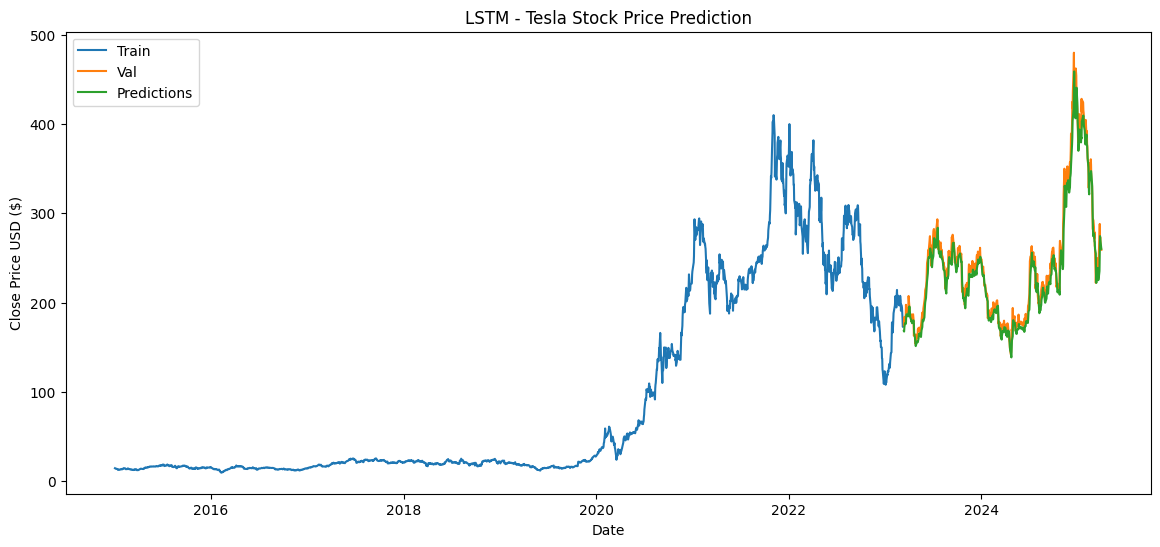

In [23]:
import matplotlib.pyplot as plt

# Use the actual column name, e.g., 'close_tsla'
close_col = [col for col in df.columns if 'close' in col][0]
  # or dynamically detect if needed

# Split data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  #  Make a deep copy to avoid SettingWithCopyWarning

# Add predictions to valid set
valid['Predictions'] = predictions

# Plotting
plt.figure(figsize=(14, 6))
plt.title('LSTM - Tesla Stock Price Prediction')
plt.plot(train[close_col], label='Train')
plt.plot(valid[[close_col, 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()


In [29]:
from datetime import timedelta
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#  Step 1: Handle MultiIndex columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]

#  Step 2: Detect the close column
print("Flattened column names in df:", df.columns.tolist())
close_col = [col for col in df.columns if 'close' in col.lower()]
if not close_col:
    raise ValueError("No column containing 'close' found in df.columns")

close_col = close_col[0]
print("Using close_col:", close_col)

#  Step 3: Extract close price data
data = df[[close_col]].copy()
if data.empty:
    raise ValueError("Filtered data is empty! Check the close column again.")
print("Data shape:", data.shape)

#  Step 4: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = data.values
scaled_data = scaler.fit_transform(dataset)

#  Step 5: Prepare input for forecasting
last_60_days = scaled_data[-60:]
future_input = last_60_days.reshape(1, 60, 1)
future_predictions = []

#  Step 6: Predict next 5 business days
for _ in range(15):
    pred = model.predict(future_input, verbose=0)[0][0]
    future_predictions.append(pred)
    future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

#  Step 7: Inverse scale predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

#  Step 8: Create bounds (optional)
lower_bounds = future_predictions * 0.87
upper_bounds = future_predictions * 1.13

#  Step 9: Generate future business dates
#  Step 9: Generate future business dates (fixing the date issue)
df.index = pd.to_datetime(df.index)         # Ensure datetime index
df = df.sort_index()                        # Sort by date
last_date = df.index[-1]                    # Get the last known date
start_date = pd.bdate_range(start=last_date + timedelta(days=1), periods=1)[0]  # First business day after last_date
future_dates = pd.date_range(start=start_date, periods=15, freq='B')             # Next 5 business days


#  Step 10: Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': future_predictions,
    'Lower Bound': lower_bounds,
    'Upper Bound': upper_bounds
})

# Optional: Reset index for continuity
forecast_df.index = range(len(df), len(df) + 15)


#  Step 11: Display result
print(forecast_df)

#  Round forecast values to two decimal places
forecast_df = forecast_df.round(2)

#  Step 12: Export to CSV for Power BI
forecast_df.to_csv("stock_lstm_forecast.csv", index=False)



Flattened column names in df: ['close_tsla', 'high_tsla', 'low_tsla', 'open_tsla', 'volume_tsla']
Using close_col: close_tsla
Data shape: (2576, 1)
           Date  Predicted Price  Lower Bound  Upper Bound
2576 2025-04-01       253.558395   220.595810   286.520996
2577 2025-04-02       247.718384   215.514999   279.921783
2578 2025-04-03       242.166397   210.684769   273.648041
2579 2025-04-04       236.791519   206.008621   267.574402
2580 2025-04-07       231.530457   201.431503   261.629425
2581 2025-04-08       226.353760   196.927765   255.779755
2582 2025-04-09       221.253723   192.490738   250.016708
2583 2025-04-10       216.234543   188.124054   244.345032
2584 2025-04-11       211.305008   183.835358   238.774658
2585 2025-04-14       206.474304   179.632645   233.315964
2586 2025-04-15       201.749466   175.522034   227.976898
2587 2025-04-16       197.135147   171.507584   222.762711
2588 2025-04-17       192.633011   167.590714   217.675308
2589 2025-04-18       188.